# Importing Necessary Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Reading Input and Target data using pandas

In [3]:
input_df = pd.read_excel("device_data_model_input.xlsx")
target_df = pd.read_excel("device_data_model_target.xlsx")
print(input_df.head())


               dt_time    op1    op2  temp  humidity
0  2024-02-28 00:00:00  261.0  231.0  22.8      63.1
1  2024-02-28 00:01:00  261.0  231.0  22.8      63.1
2  2024-02-28 00:02:00  262.0  231.0  22.8      63.3
3  2024-02-28 00:03:00  261.0  231.0  22.8      63.4
4  2024-02-28 00:04:00  260.0  231.0  22.7      63.5


In [4]:
print(target_df.head())

               dt_time    ws     wd
0  24-02-2024 00:00:00  2.53  347.8
1  24-02-2024 00:01:00  2.30    0.2
2  24-02-2024 00:02:00  0.34  293.2
3  24-02-2024 00:03:00  1.61  350.2
4  24-02-2024 00:04:00  2.17  317.3


In [5]:
# Convert dt_time to datetime format
input_df["dt_time"] = pd.to_datetime(input_df["dt_time"], errors='coerce')
target_df["dt_time"] = pd.to_datetime(target_df["dt_time"], format="%d-%m-%Y %H:%M:%S", errors='coerce')

In [6]:
#Merging datasets on dt_time
merged_df = pd.merge(input_df, target_df, on="dt_time", how="inner")

In [7]:
merged_df.head()

,dt_time,op1,op2,temp,humidity,ws,wd
0,2024-02-28 00:00:00,261.0,231.0,22.8,63.1,1.01,344.0
1,2024-02-28 00:01:00,261.0,231.0,22.8,63.1,3.42,282.5
2,2024-02-28 00:02:00,262.0,231.0,22.8,63.3,6.78,334.4
3,2024-02-28 00:03:00,261.0,231.0,22.8,63.4,2.89,17.5
4,2024-02-28 00:04:00,260.0,231.0,22.7,63.5,2.33,329.0


# Handle Missing Values

In [8]:
for col in ["op1", "op2", "temp", "humidity"]:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)

C:\Users\rkpat\AppData\Local\Temp\ipykernel_19512\27336950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mean(), inplace=True)


In [9]:
merged_df.head()

,dt_time,op1,op2,temp,humidity,ws,wd
0,2024-02-28 00:00:00,261.0,231.0,22.8,63.1,1.01,344.0
1,2024-02-28 00:01:00,261.0,231.0,22.8,63.1,3.42,282.5
2,2024-02-28 00:02:00,262.0,231.0,22.8,63.3,6.78,334.4
3,2024-02-28 00:03:00,261.0,231.0,22.8,63.4,2.89,17.5
4,2024-02-28 00:04:00,260.0,231.0,22.7,63.5,2.33,329.0


# Exploratory Data Analysis by creating a pipeline for it

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13778 entries, 0 to 13777
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dt_time   13778 non-null  datetime64[ns]
 1   op1       13778 non-null  float64       
 2   op2       13778 non-null  float64       
 3   temp      13778 non-null  float64       
 4   humidity  13778 non-null  float64       
 5   ws        13778 non-null  float64       
 6   wd        13778 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 753.6 KB


In [11]:
merged_df.isnull().sum()

dt_time     0
op1         0
op2         0
temp        0
humidity    0
ws          0
wd          0
dtype: int64

In [21]:

summary_stats = merged_df.describe().T  

summary_stats = summary_stats[["min", "max", "mean"]]

summary_stats.columns = ["Min", "Max", "Mean"]

summary_stats = summary_stats.round(2)

print("Feature Summary:\n")
for col in summary_stats.index:
    print(f"{col}: Ranges from {summary_stats.loc[col, 'Min']} to {summary_stats.loc[col, 'Max']}, mean {summary_stats.loc[col, 'Mean']}")


Feature Summary:

dt_time: Ranges from 2024-02-28 00:00:00 to 2024-03-08 23:59:00, mean 2024-03-04 00:01:22.775439104
op1: Ranges from 228.0 to 311.0, mean 256.7163209566694
op2: Ranges from 214.0 to 238.0, mean 228.2361408429911
temp: Ranges from 18.1 to 45.7, mean 29.697054698457222
humidity: Ranges from 6.8 to 80.6, mean 35.35672104524987
ws: Ranges from 0.0 to 13.02, mean 1.5626128610828858
wd: Ranges from 0.0 to 359.9, mean 211.06819567426328


In [13]:
sns.set(style="whitegrid")

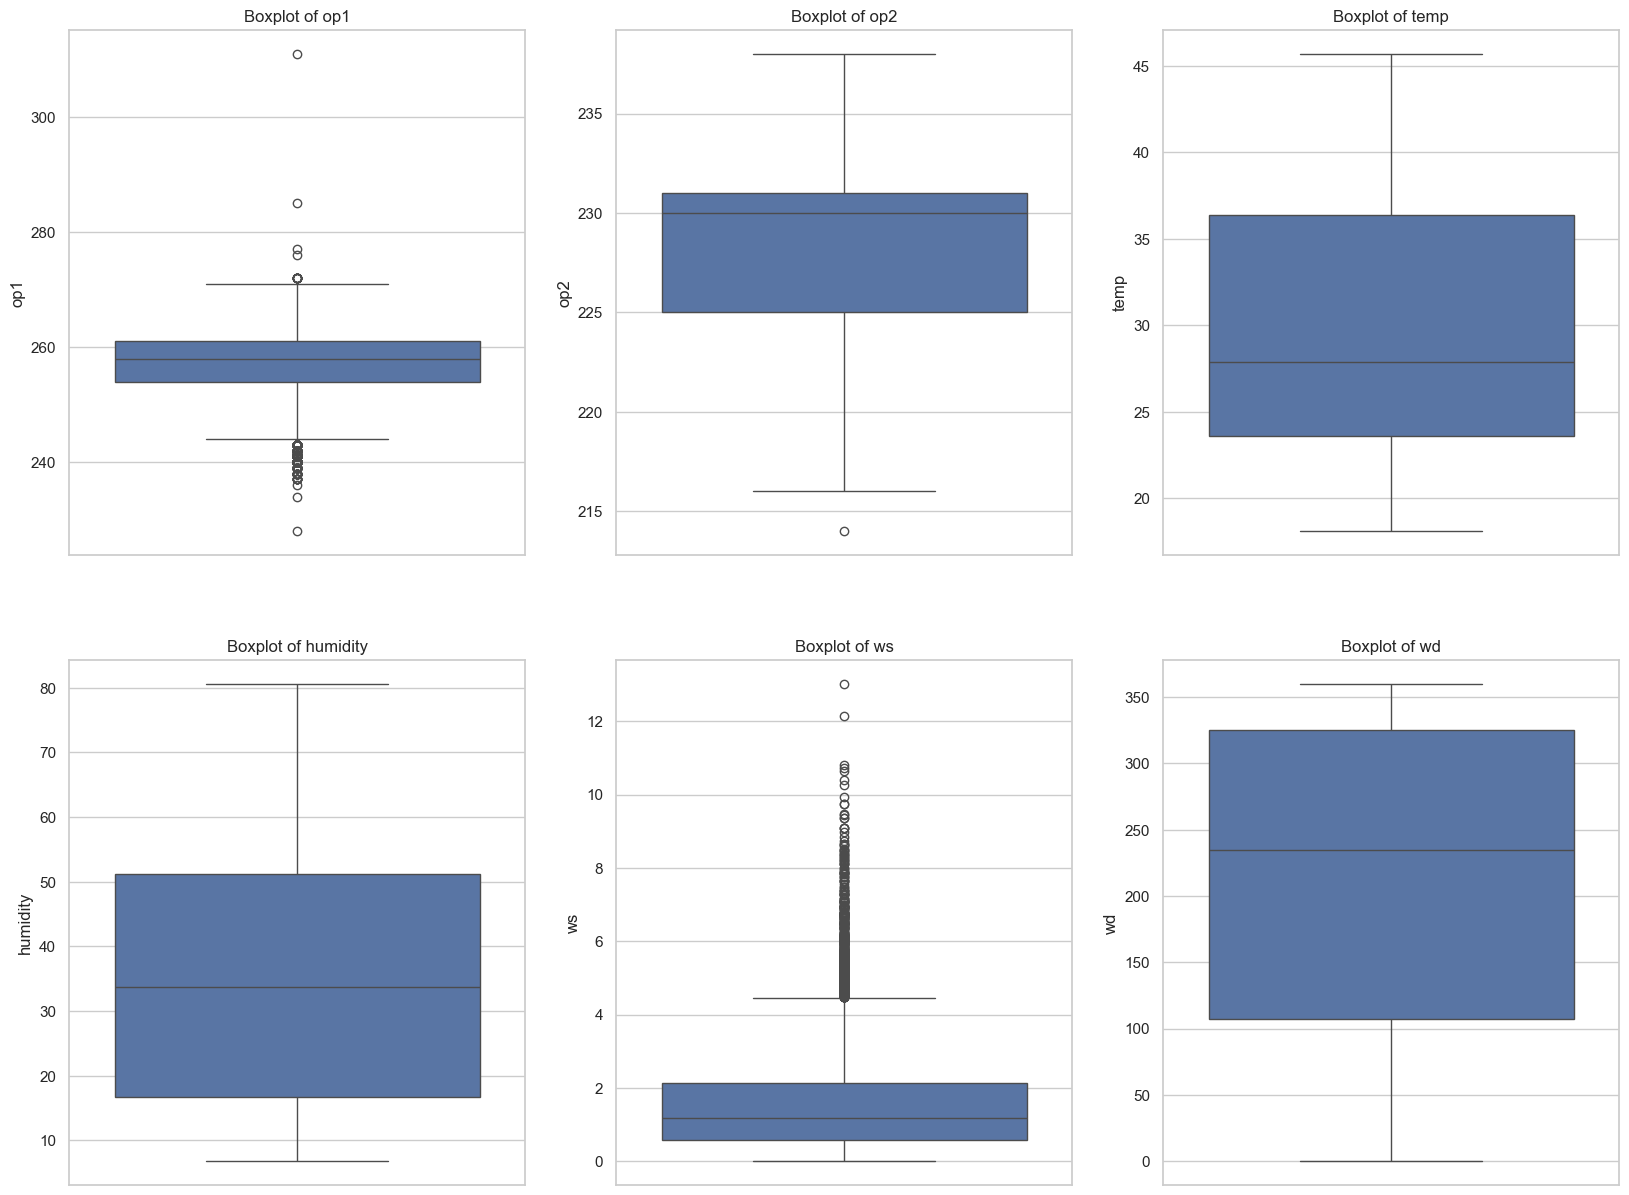

In [14]:
from matplotlib import pyplot as plt

fig , ax = plt.subplots(2, 3, figsize=(20, 15))
columns = ["op1", "op2", "temp", "humidity", "ws", "wd"]

for i, col in enumerate(columns):
    sns.boxplot(merged_df[col], ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f"Boxplot of {col}")


# Compute Correlations (Pearson and Spearman)

In [15]:
# Compute correlation matrices correctly
pearson_corr = merged_df.drop(columns=["dt_time"]).corr(method="pearson")
spearman_corr = merged_df.drop(columns=["dt_time"]).corr(method="spearman")

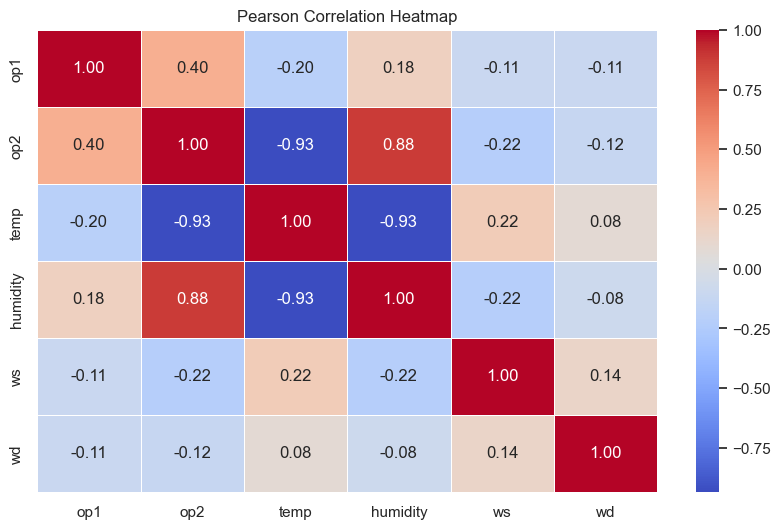

In [16]:
# 🎯 Pearson Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()

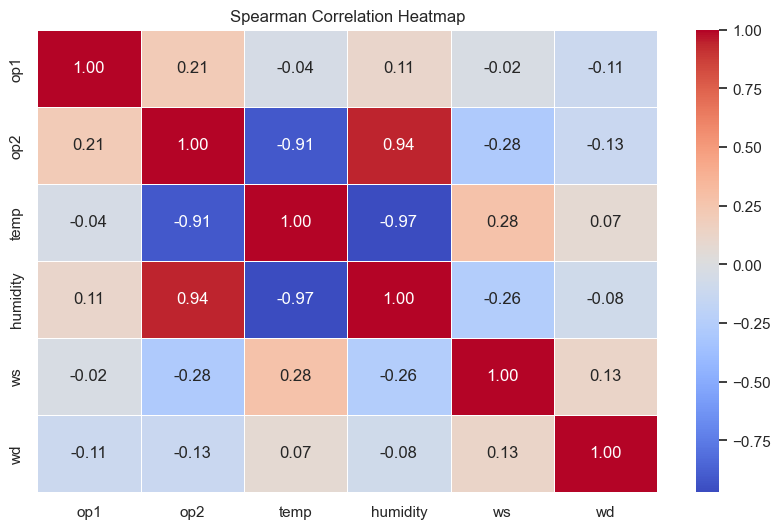

In [17]:
# Spearman Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap")
plt.show()


In [18]:
#Saving cleaned data
merged_data = "C:\Github\some projects\Minor Project\merged_data.csv"
merged_df.to_csv(merged_data, index=False)